In [1]:
import glob
import pandas as pd
from Bio import SeqIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import subplots_adjust
import matplotlib.ticker as mticks
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

In [2]:
# Get the predicted localisations
def make_targetp_dict(orthogroup_targetP_files):
    targetp_df = pd.read_csv(orthogroup_targetP_files, delimiter = '\t')
    targetp_dict1 = pd.Series(targetp_df['loc'].values, index=targetp_df['gene']).to_dict()
    targetp_dict2 = {}
    for key in targetp_dict1:
        if targetp_dict1[key] == 'P':
            targetp_dict2[key] = 'PTS'
        else:
            targetp_dict2[key] = targetp_dict1[key]
    return(targetp_dict2)

In [3]:
# Fetch the relevant genes from the orthogroup
def get_species_genes(fasta_file, species_string, delimiter, delimiter_position):
    genes = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        if species_string in record.id:
            gene_list = ((record.id).split(delimiter))
            gene = delimiter.join(gene_list[:delimiter_position])
            genes.append(gene)
    return(genes)

In [4]:
def get_new_position(ax, shiftx_dist, shifty_dist):
    original_pos = ax.get_position() # get the original position 
    pos_new = [original_pos.x0 + shiftx_dist, original_pos.y0 + shifty_dist,  original_pos.width, original_pos.height] 
    return(pos_new)

In [5]:
def maize_M_BS_chang(ax, orthogroup_fasta_file):
    maize_genes = get_species_genes(orthogroup_fasta_file, 'Zm0', '_', 1)     
    orthogroup_location_dict = {}
    for key in targetp_dict:
        if 'Zm0' in key:
            orthogroup_location_dict[(key.split('_'))[0]] = targetp_dict[key]
    
    chang_df = pd.read_csv("../../DPhil/AILP1_informatics/data/RNA_seq/SRA047278_maize_chang_TPMs_concant_gene_models.csv", delim_whitespace=True)
    chang_df = chang_df.loc[chang_df['Name'].isin(maize_genes)]
    chang_df['M_mean_TPM'] = chang_df[['SRR354212_TPM', 'SRR354213_TPM']].mean(axis = 1) 
    chang_df['BS_mean_TPM'] = chang_df[['SRR354214_TPM', 'SRR354215_TPM']].mean(axis = 1)
    
    rgb_colours = []
    for i, row in chang_df.iterrows():
        if orthogroup_location_dict[row['Name']] == 'cTP':
            rgb_colours.append('#228833')
        if orthogroup_location_dict[row['Name']] == 'mTP':
            rgb_colours.append('#EE6677')
        if orthogroup_location_dict[row['Name']] == 'SP':
            rgb_colours.append('#CCBB44')
        if orthogroup_location_dict[row['Name']] == 'PTS':
            rgb_colours.append('#AA3377')
        if orthogroup_location_dict[row['Name']] == 'noTP':
            rgb_colours.append('#4477AA')
        
    chang_df['colour'] = rgb_colours
    
   
    chang_df['M_summed_mean'] = chang_df['M_mean_TPM'].groupby(chang_df['colour']).transform('sum')
    chang_df['BS_summed_mean'] = chang_df['BS_mean_TPM'].groupby(chang_df['colour']).transform('sum')
    
    cumval_M = 0
    cumval_BS = 0
    
    sorted_M = chang_df.set_index('Name').sort_values('M_summed_mean')['M_mean_TPM']
    sorted_BS = chang_df.set_index('Name').sort_values('BS_summed_mean')['BS_mean_TPM']
    colours = chang_df.set_index('Name')['colour']
    
    for name, value in sorted_M.iteritems():
        ax.bar('M', value, bottom=cumval_M, label=(orthogroup_location_dict[name] + ' ' + name), color=colours[name])
        cumval_M += value
        
    for name, value in sorted_BS.iteritems():
        ax.bar('BS', value, bottom=cumval_BS, color=colours[name])
        cumval_BS += value
    
    ax.set_ylabel('TPM')
    ax.legend()
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    ax.set_ylabel('TPM', fontsize=fig_variables['y_label_font_size'])
    ax.get_legend().remove()
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(fig_variables['x_tick_font_size'])
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])

    ax.set_title('Maize', size=fig_variables['title_size'])

In [6]:
def maize_M_BS_tausta(ax1, ax2, orthogroup_fasta_file):
    maize_genes = get_species_genes(orthogroup_fasta_file, 'Zm0', '_', 1)     
    orthogroup_location_dict = {}
    for key in targetp_dict:
        if 'Zm0' in key:
            orthogroup_location_dict[(key.split('_'))[0]] = targetp_dict[key]

    tausta_df = pd.read_csv("../../DPhil/AILP1_informatics/data/RNA_seq/SRP035577_merged_TPMs_concated_gene_models.csv", delim_whitespace=True)
    tausta_df = tausta_df.loc[tausta_df['Name'].isin(maize_genes)]

    tausta_df['M_mean_sec_4_TPM'] = tausta_df[['GSM1311350_TPM', 'GSM1311351_TPM']].mean(axis = 1)
    tausta_df['M_mean_sec_9_TPM'] = tausta_df[['GSM1311354_TPM', 'GSM1311355_TPM']].mean(axis = 1) 
    tausta_df['M_mean_sec_14_TPM'] = tausta_df[['GSM1311358_TPM', 'GSM1311359_TPM']].mean(axis = 1) 
    tausta_df['BS_mean_sec_4_TPM'] = tausta_df[['GSM1311348_TPM', 'GSM1311349_TPM']].mean(axis = 1)
    tausta_df['BS_mean_sec_9_TPM'] = tausta_df[['GSM1311352_TPM', 'GSM1311353_TPM']].mean(axis = 1) 
    tausta_df['BS_mean_sec_14_TPM'] = tausta_df[['GSM1311356_TPM', 'GSM1311357_TPM']].mean(axis = 1) 
    
    rgb_colours = []
    for i, row in tausta_df.iterrows():
        if orthogroup_location_dict[row['Name']] == 'cTP':
            rgb_colours.append('#228833')
        if orthogroup_location_dict[row['Name']] == 'mTP':
            rgb_colours.append('#EE6677')
        if orthogroup_location_dict[row['Name']] == 'SP':
            rgb_colours.append('#CCBB44')
        if orthogroup_location_dict[row['Name']] == 'PTS':
            rgb_colours.append('#AA3377')
        if orthogroup_location_dict[row['Name']] == 'noTP':
            rgb_colours.append('#4477AA')
    tausta_df['colour'] = rgb_colours
    
    lines = ["-","--","-.",":"]
    tausta_df.sort_values(by=['colour'], inplace=True)
    tausta_df.reset_index(inplace=True)
    maize_tp_name = []
    line_styles = []
    count = 1
    for i, row in tausta_df.iterrows():
        maize_tp_name.append(orthogroup_location_dict[row['Name']] + ' ' + row['Name'])
        if i == 0:
            line_styles.append(lines[0])
            count = 1
        elif (tausta_df.iloc[i]['colour']) == (tausta_df.iloc[i-1]['colour']):
            line_styles.append(lines[count])
            count+=1
        else:
            line_styles.append(lines[0])
            count = 1

    tausta_df['maize_tp_name'] = maize_tp_name
    tausta_df['line'] = line_styles

    tausta_df = tausta_df.set_index('maize_tp_name')

    tausta_df[['M_mean_sec_4_TPM', 'M_mean_sec_9_TPM', 'M_mean_sec_14_TPM']].transpose().plot(ax=ax1, color=tausta_df['colour'], style=list(tausta_df['line']), linewidth=1.5)
    tausta_df[['BS_mean_sec_4_TPM', 'BS_mean_sec_9_TPM', 'BS_mean_sec_14_TPM']].transpose().plot(ax=ax2, color=tausta_df['colour'], style=list(tausta_df['line']), linewidth=1.5)
    N=3
    ax1.set_xticklabels(['-1', '+4', '+9'])
    ax2.set_xticklabels(['-1', '+4', '+9'])
    ax1.get_xaxis().set_major_locator(mticks.LinearLocator(numticks=N))
    ax2.get_xaxis().set_major_locator(mticks.LinearLocator(numticks=N))

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    ax1.set_xlabel('cm from transition zone')
    ax2.set_xlabel('cm from transition zone')
    
    
    
    ax1.get_legend().remove()
    ax1.legend(fontsize=fig_variables['legend_font_size'])
    ax1.set_xlabel('cm from transition zone', fontsize=fig_variables['x_label_font_size'])
    ax2.set_xlabel('cm from transition zone', fontsize=fig_variables['x_label_font_size'])
    #ax1.set_ylim(0, 6000)
    #ax1.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
    ax1.set_ylabel('TPM', fontsize=fig_variables['y_label_font_size'])
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])
        
    ax2.get_legend().remove()
    #ax2.set_ylim(0, 6000)
    #ax2.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
    ax2.tick_params(labelleft=False) 

    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])

    ax1.set_title('Maize\nmesophyll', size=fig_variables['title_size'])
    ax2.set_title('Maize\nbundle Sheath', size=fig_variables['title_size'])



In [7]:
def maize_foliar_husk_wang(ax1, ax2, orthogroup_fasta_file):
    maize_genes = get_species_genes(orthogroup_fasta_file, 'Zm0', '_', 1)     
    orthogroup_location_dict = {}
    for key in targetp_dict:
        if 'Zm0' in key:
            orthogroup_location_dict[(key.split('_'))[0]] = targetp_dict[key]

    wang_df = pd.read_csv("../../DPhil/AILP1_informatics/data/RNA_seq/SRP028231_Wang_merged_TPMs_concated_gene_models.csv", delim_whitespace=True)
    wang_df = wang_df.loc[wang_df['Name'].isin(maize_genes)]

    wang_df['F_AM_P1_P2'] = wang_df['SRR942909_TPM']
    wang_df['F_P3_P4'] = wang_df['SRR942915_TPM']
    wang_df['F_P5'] = wang_df['SRR942916_TPM']
    wang_df['F_I'] = wang_df['SRR942911_TPM']
    wang_df['F_E'] = wang_df['SRR942910_TPM']
    wang_df['H_P1_P2'] = wang_df['SRR942912_TPM']
    wang_df['H_P3_P4'] = wang_df['SRR942917_TPM']
    wang_df['H_P5'] = wang_df['SRR942918_TPM']
    wang_df['H_I'] = wang_df['SRR942913_TPM']
    wang_df['H_E'] = wang_df['SRR942914_TPM']

    rgb_colours = []
    for i, row in wang_df.iterrows():
        if orthogroup_location_dict[row['Name']] == 'cTP':
            rgb_colours.append('#228833')
        if orthogroup_location_dict[row['Name']] == 'mTP':
            rgb_colours.append('#EE6677')
        if orthogroup_location_dict[row['Name']] == 'SP':
            rgb_colours.append('#CCBB44')
        if orthogroup_location_dict[row['Name']] == 'PTS':
            rgb_colours.append('#AA3377')
        if orthogroup_location_dict[row['Name']] == 'noTP':
            rgb_colours.append('#4477AA')
    wang_df['colour'] = rgb_colours
    
    lines = ["-","--","-.",":"]
    wang_df.sort_values(by=['colour'], inplace=True)
    wang_df.reset_index(inplace=True)
    maize_tp_name = []
    line_styles = []
    count = 1
    for i, row in wang_df.iterrows():
        maize_tp_name.append(orthogroup_location_dict[row['Name']] + ' ' + row['Name'])
        if i == 0:
            line_styles.append(lines[0])
            count = 1
        elif (wang_df.iloc[i]['colour']) == (wang_df.iloc[i-1]['colour']):
            line_styles.append(lines[count])
            count+=1
        else:
            line_styles.append(lines[0])
            count = 1

    wang_df['maize_tp_name'] = maize_tp_name
    wang_df['line'] = line_styles

    wang_df = wang_df.set_index('maize_tp_name')
    

    wang_df[['H_P1_P2', 'H_P3_P4', 'H_P5', 'H_I', 'H_E']].transpose().plot(ax=ax1, color=wang_df['colour'], style=list(wang_df['line']), linewidth=1.5)
    wang_df[['F_AM_P1_P2', 'F_P3_P4', 'F_P5', 'F_I', 'F_E']].transpose().plot(ax=ax2, color=wang_df['colour'], style=list(wang_df['line']), linewidth=1.5)
    N=5
    ax1.set_xticklabels(['P1-P2', 'P3-P4', 'P5', 'I', 'E'])
    ax2.set_xticklabels(['AM-P2', 'P3-P4', 'P5', 'I', 'E'])
    ax1.get_xaxis().set_major_locator(mticks.LinearLocator(numticks=N))
    ax2.get_xaxis().set_major_locator(mticks.LinearLocator(numticks=N))

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    ax1.set_xlabel('Developmental stage')
    ax2.set_xlabel('Developmental stage')
    
    
    
    ax1.get_legend().remove()
    ax1.set_xlabel('Developmental stage', fontsize=fig_variables['x_label_font_size'])
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])
    #ax1.set_ylim(0, 6000)
    #ax1.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])
    ax1.set_ylabel('TPM', fontsize=fig_variables['y_label_font_size'])

    ax2.get_legend().remove()
    ax2.set_xlabel('Developmental stage', fontsize=fig_variables['x_label_font_size'])
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(fig_variables['x_tick_font_size'])
    #ax2.set_ylim(0, 6000)
    #ax2.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
    ax2.tick_params(labelleft=False) 

    ax1.set_title('Maize\nhusk Leaf', size=fig_variables['title_size'])
    ax2.set_title('Maize\nfoliar Leaf', size=fig_variables['title_size'])


In [8]:
def plot_row(index):
    # Chang - aspAT
    ax1 = fig.add_subplot(spec[index,0])
    maize_M_BS_chang(ax1, orthogroup_fasta_file)


    # Tausta - aspAT
    ax2 = fig.add_subplot(spec[index, 1], sharey=ax1)
    ax3 = fig.add_subplot(spec[index, 2], sharey=ax1)
    ax2.set_position(get_new_position(ax2, 0.04, 0))
    ax3.set_position(get_new_position(ax3, 0.04, 0))
    maize_M_BS_tausta(ax2, ax3, orthogroup_fasta_file)


    # Wang - aspAT
    ax4 = fig.add_subplot(spec[index, 3], sharey = ax1)
    ax5 = fig.add_subplot(spec[index, 4], sharey = ax1)
    ax4.set_position(get_new_position(ax4, 0.08, 0))
    ax5.set_position(get_new_position(ax5, 0.08, 0))
    maize_foliar_husk_wang(ax4, ax5, orthogroup_fasta_file)
    
    labels = ['Aspartate aminotransferase']
    axs = [ax1]
    for n, ax in enumerate(axs):  
        ax.text(-0.15, 1.15, labels[n], transform=ax.transAxes, 
            size=20, weight='normal')

NameError: name 'ax1' is not defined

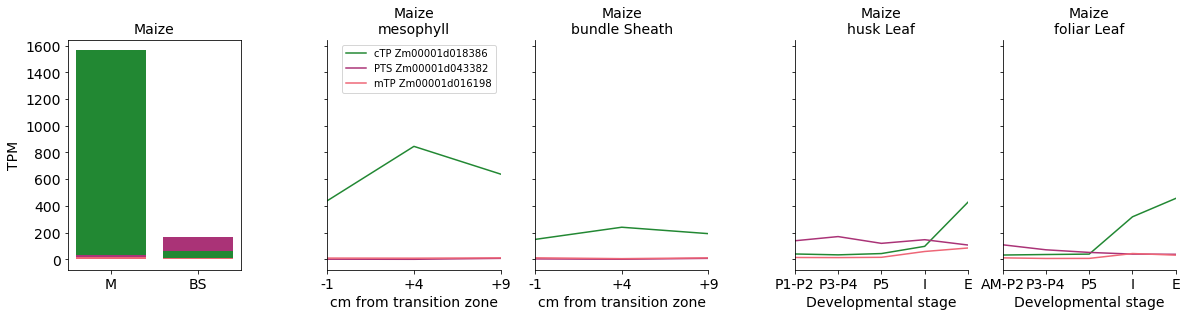

In [9]:
fig_variables = { "legend_font_size": 10, "y_label_font_size": 14, "x_label_font_size": 14, "x_tick_font_size": 14,
                  "y_tick_font_size": 12, "arabidopsis_x_tick_font_size": 12, "title_size": 14, "figsize": (18,14.4), "left": 0.125, 
                  "bottom": 0.1, "right": 0.9, "top": 0.9, "wspace": 0.2, "hspace": 0.60}

fig = plt.figure(constrained_layout=False, figsize=fig_variables['figsize'])
spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)

### aspAT ###

orthogroup_fasta_file = ('../../DPhil/AILP1_informatics/data/msa_data/Orthogroups/OG0000890.fa')
targetP_file = ('../../DPhil/AILP1_informatics/data/msa_data/targetP_results/OG0000890_targetp2_PTS.txt')
targetp_dict = make_targetp_dict(targetP_file)

plot_row(0, 'Aspartate aminotransferase')



    


# plt.savefig('../figures/ailp1Expression.pdf', bbox_inches='tight')